In [1]:
import pandas as pd

train_prob = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_problem_data.csv', thousands = ',')
train_qual = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_quality_data.csv', thousands = ',')
train_err = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_err_data.csv', thousands = ',')

In [2]:
import datetime as dt

# 필요한 함수 정의
def make_datetime(x):
    # string 타입의 Time column을 datetime 타입으로 변경
    x     = str(x)
    year  = int(x[:4])
    month = int(x[4:6])
    day   = int(x[6:8])
    hour  = int(x[8:10])
    #min  = int(x[10:12])
    #sec  = int(x[12:])
    return dt.datetime(year, month, day, hour)

In [3]:
train_qual.head()

time  user_id       fwver  ...  quality_10  quality_11  quality_12
0  20201129090000    10000  05.15.2138  ...           4           0           0
1  20201129090000    10000  05.15.2138  ...           4           0           0
2  20201129090000    10000  05.15.2138  ...           4           0           0
3  20201129090000    10000  05.15.2138  ...           4           0           0
4  20201129090000    10000  05.15.2138  ...           4           0           0

[5 rows x 16 columns]

In [4]:
train_qual['datetime'] = train_qual['time'].apply(make_datetime)

train_qual['year'] = train_qual.loc[:,'datetime'].dt.year
train_qual['month'] = train_qual.loc[:,'datetime'].dt.month

min_day = train_qual.datetime.min().date()

train_qual['days'] = train_qual.loc[:,'datetime'].dt.date - min_day
train_qual['days'] = train_qual['days'].dt.days

train_qual['hour'] = train_qual.loc[:, 'datetime'].dt.hour

In [5]:
train_qual.head()

time  user_id       fwver  quality_0  ...  year  month  days  hour
0  20201129090000    10000  05.15.2138        0.0  ...  2020     11    29     9
1  20201129090000    10000  05.15.2138        0.0  ...  2020     11    29     9
2  20201129090000    10000  05.15.2138        0.0  ...  2020     11    29     9
3  20201129090000    10000  05.15.2138        0.0  ...  2020     11    29     9
4  20201129090000    10000  05.15.2138        0.0  ...  2020     11    29     9

[5 rows x 21 columns]

In [6]:
train_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        828624 non-null  int64         
 1   user_id     828624 non-null  int64         
 2   fwver       788544 non-null  object        
 3   quality_0   684192 non-null  float64       
 4   quality_1   828624 non-null  int64         
 5   quality_2   788511 non-null  float64       
 6   quality_3   828624 non-null  int64         
 7   quality_4   828624 non-null  int64         
 8   quality_5   828604 non-null  float64       
 9   quality_6   828624 non-null  int64         
 10  quality_7   828624 non-null  int64         
 11  quality_8   828624 non-null  int64         
 12  quality_9   828624 non-null  int64         
 13  quality_10  828624 non-null  int64         
 14  quality_11  828624 non-null  int64         
 15  quality_12  828624 non-null  int64         
 16  da

In [7]:
train_qual['fwver_int'] = train_qual['fwver'].str.replace('.', '')

In [8]:
train_qual.drop(columns = ['fwver', 'time', 'datetime'], inplace= True)

In [9]:
train_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     828624 non-null  int64  
 1   quality_0   684192 non-null  float64
 2   quality_1   828624 non-null  int64  
 3   quality_2   788511 non-null  float64
 4   quality_3   828624 non-null  int64  
 5   quality_4   828624 non-null  int64  
 6   quality_5   828604 non-null  float64
 7   quality_6   828624 non-null  int64  
 8   quality_7   828624 non-null  int64  
 9   quality_8   828624 non-null  int64  
 10  quality_9   828624 non-null  int64  
 11  quality_10  828624 non-null  int64  
 12  quality_11  828624 non-null  int64  
 13  quality_12  828624 non-null  int64  
 14  year        828624 non-null  int64  
 15  month       828624 non-null  int64  
 16  days        828624 non-null  int64  
 17  hour        828624 non-null  int64  
 18  fwver_int   788544 non-null  object 
dtypes:

In [10]:
train_qual.head()

user_id  quality_0  quality_1  quality_2  ...  month  days  hour  fwver_int
0    10000        0.0          0        0.0  ...     11    29     9   05152138
1    10000        0.0          0        0.0  ...     11    29     9   05152138
2    10000        0.0          0        0.0  ...     11    29     9   05152138
3    10000        0.0          0        0.0  ...     11    29     9   05152138
4    10000        0.0          0        0.0  ...     11    29     9   05152138

[5 rows x 19 columns]

In [11]:
train_qual.dropna(axis = 0, inplace=True)

In [12]:
train_qual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684139 entries, 0 to 828623
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     684139 non-null  int64  
 1   quality_0   684139 non-null  float64
 2   quality_1   684139 non-null  int64  
 3   quality_2   684139 non-null  float64
 4   quality_3   684139 non-null  int64  
 5   quality_4   684139 non-null  int64  
 6   quality_5   684139 non-null  float64
 7   quality_6   684139 non-null  int64  
 8   quality_7   684139 non-null  int64  
 9   quality_8   684139 non-null  int64  
 10  quality_9   684139 non-null  int64  
 11  quality_10  684139 non-null  int64  
 12  quality_11  684139 non-null  int64  
 13  quality_12  684139 non-null  int64  
 14  year        684139 non-null  int64  
 15  month       684139 non-null  int64  
 16  days        684139 non-null  int64  
 17  hour        684139 non-null  int64  
 18  fwver_int   684139 non-null  object 
dtypes:

In [13]:
train_qual.reset_index(drop = True, inplace = True)

In [14]:
x_data = train_qual.drop(columns = 'user_id').astype(float)
x_data.corr()

quality_0  quality_1  quality_2  ...      days      hour  fwver_int
quality_0    1.000000   0.004307   0.999535  ... -0.003347  0.002715   0.012058
quality_1    0.004307   1.000000   0.004319  ...  0.003182  0.037544  -0.001389
quality_2    0.999535   0.004319   1.000000  ... -0.003342  0.002665   0.012028
quality_3         NaN        NaN        NaN  ...       NaN       NaN        NaN
quality_4         NaN        NaN        NaN  ...       NaN       NaN        NaN
quality_5    0.067711   0.017408   0.067929  ...  0.002941 -0.004104   0.000990
quality_6   -0.000135   0.043926  -0.000137  ... -0.013722  0.001318   0.023385
quality_7    0.000681   0.026310   0.000677  ... -0.016887  0.001053   0.028837
quality_8   -0.001136   0.196936  -0.001140  ...  0.019972  0.023834   0.025063
quality_9    0.531756  -0.001526   0.531654  ... -0.006291  0.005032   0.022677
quality_10   0.033348   0.002350   0.033701  ...  0.004247 -0.006139   0.002287
quality_11   0.006627   0.869947   0.006641  ... -0.001175  0.037721  -0.006950
quality_12   0.009608   0.001891   0.009601  ... -0.001434  0.002656   0.016801
year              NaN        NaN        NaN  ...       NaN       NaN        NaN
month        0.000154  -0.002321   0.000155  ...  0.029896 -0.023514   0.000069
days        -0.003347   0.003182  -0.003342  ...  1.000000 -0.042957   0.000058
hour         0.002715   0.037544   0.002665  ... -0.042957  1.000000  -0.013149
fwver_int    0.012058  -0.001389   0.012028  ...  0.000058 -0.013149   1.000000

[18 rows x 18 columns]

In [15]:
x_data.quality_3.unique()

array([0.])

In [16]:
x_data.quality_4.unique()

array([0.])

In [17]:
x_data.year.unique()

array([2020.])

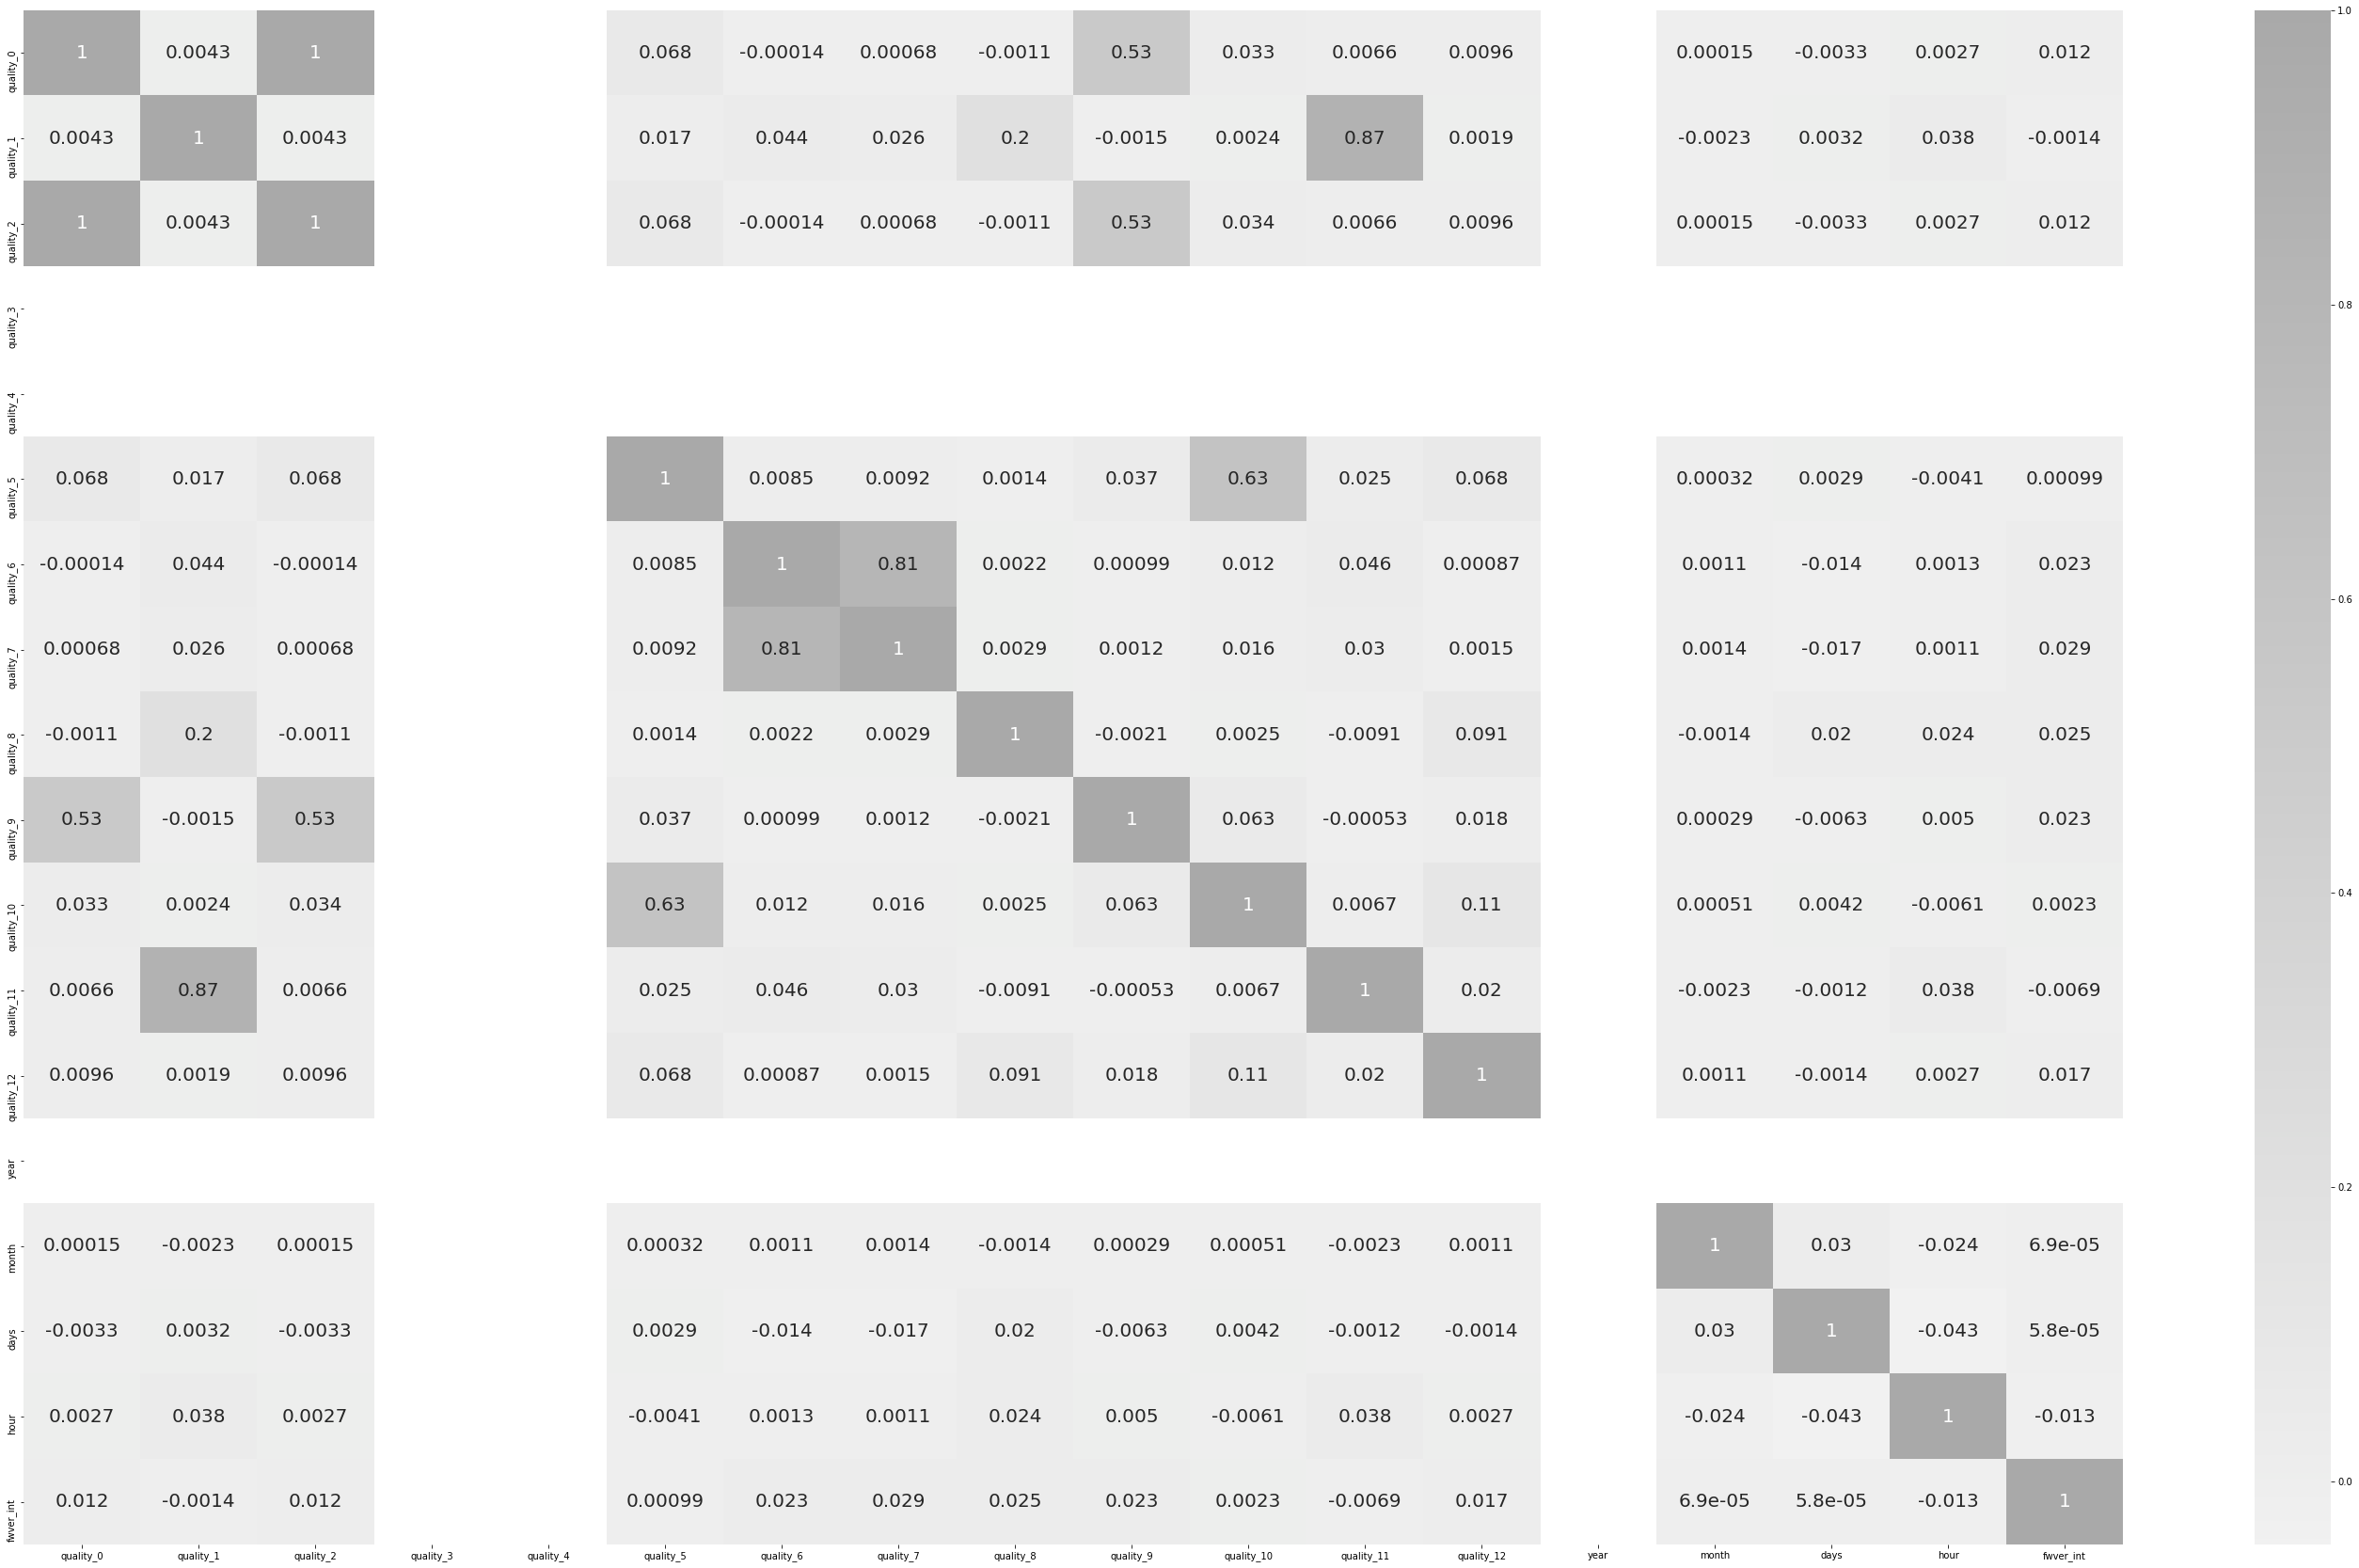

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 30))
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_data.corr(), annot=True, cmap=cmap, annot_kws={"size": 20})
plt.show()

In [19]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

#  다중 선형회귀분석
x_data = train_qual.drop(columns = 'user_id') #변수 여러개
target = train_qual[["user_id"]]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target.astype(float), x_data.astype(float))
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                user_id   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     165.9
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:28:14   Log-Likelihood:            -6.7069e+06
No. Observations:              684139   AIC:                         1.341e+07
Df Residuals:                  684123   BIC:                         1.341e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quality_0     -0.4425      0.362     -1.221      0.222      -1.153       0.268
quality_1      4.3882     25.867      0.170      0.865     -46.311      55.087
quality_2      0.4436      0.362      1.225      0.221      -0.266       1.154
quality_3  -1.129e-12   1.15e-12     -0.978      0.328   -3.39e-12    1.13e-12
quality_4   2.085e-13   2.05e-13      1.018      0.309   -1.93e-13     6.1e-13
quality_5      0.0002      0.003      0.057      0.954      -0.005       0.006
quality_6      0.0435      0.260      0.167      0.867      -0.466       0.553
quality_7     -0.3940      0.027    -14.800      0.000      -0.446      -0.342
quality_8    -40.7430      5.134     -7.936      0.000     -50.805     -30.681
quality_9      0.0169      0.002      8.272      0.000       0.013       0.021
quality_10    -0.0015      0.000     -3.936      0.000      -0.002      -0.001
quality_11  -170.0129     29.285     -5.806      0.000    -227.410    -112.616
quality_12   -70.6558     28.242     -2.502      0.012    -126.010     -15.302
year           8.3209      1.671      4.980      0.000       5.046      11.596
month        -96.7843    306.829     -0.315      0.752    -698.159     504.591
days          -1.6173      0.605     -2.673      0.008      -2.803      -0.431
hour           2.4013      0.745      3.224      0.001       0.941       3.861
fwver_int      0.0004   1.04e-05     38.836      0.000       0.000       0.000
==============================================================================
Omnibus:                   846541.373   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43286.444
Skew:                          -0.005   Prob(JB):                         0.00
Kurtosis:                       1.768   Cond. No.                     3.66e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

# 다중 선형회귀분석
x_data_2 = x_data.drop(columns = 'quality_5')#변수 여러개
target = train_qual[["user_id"]]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model_2 = sm.OLS(target.astype(float), x_data_2.astype(float))
fitted_multi_model_2 = multi_model_2.fit()
fitted_multi_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                user_id   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     177.8
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:28:15   Log-Likelihood:            -6.7069e+06
No. Observations:              684139   AIC:                         1.341e+07
Df Residuals:                  684124   BIC:                         1.341e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quality_0     -0.4425      0.362     -1.221      0.222      -1.153       0.268
quality_1      4.3787     25.867      0.169      0.866     -46.319      55.077
quality_2      0.4436      0.362      1.225      0.221      -0.266       1.154
quality_3  -1.829e-12    4.2e-13     -4.354      0.000   -2.65e-12   -1.01e-12
quality_4  -1.776e-13   1.25e-13     -1.425      0.154   -4.22e-13    6.67e-14
quality_6      0.0435      0.260      0.167      0.867      -0.466       0.553
quality_7     -0.3940      0.027    -14.800      0.000      -0.446      -0.342
quality_8    -40.7421      5.134     -7.936      0.000     -50.804     -30.680
quality_9      0.0169      0.002      8.277      0.000       0.013       0.021
quality_10    -0.0015      0.000     -4.992      0.000      -0.002      -0.001
quality_11  -169.9832     29.280     -5.805      0.000    -227.371    -112.595
quality_12   -70.6603     28.242     -2.502      0.012    -126.014     -15.307
year           8.3209      1.671      4.980      0.000       5.046      11.596
month        -96.7839    306.829     -0.315      0.752    -698.159     504.591
days          -1.6173      0.605     -2.673      0.008      -2.803      -0.431
hour           2.4012      0.745      3.224      0.001       0.941       3.861
fwver_int      0.0004   1.04e-05     38.836      0.000       0.000       0.000
==============================================================================
Omnibus:                   846541.249   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43286.444
Skew:                          -0.005   Prob(JB):                         0.00
Kurtosis:                       1.768   Cond. No.                     7.22e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.68e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
# 다중 선형회귀분석
x_data_3 = x_data_2.drop(columns = 'quality_6')#변수 여러개
target = train_qual[["user_id"]]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model_3 = sm.OLS(target.astype(float), x_data_3.astype(float))
fitted_multi_model_3 = multi_model_3.fit()
fitted_multi_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                user_id   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     191.5
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:28:16   Log-Likelihood:            -6.7069e+06
No. Observations:              684139   AIC:                         1.341e+07
Df Residuals:                  684125   BIC:                         1.341e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quality_0     -0.4425      0.362     -1.221      0.222      -1.153       0.268
quality_1      4.4380     25.864      0.172      0.864     -46.255      55.131
quality_2      0.4436      0.362      1.225      0.221      -0.266       1.154
quality_3   1.784e-12   8.47e-13      2.106      0.035    1.24e-13    3.44e-12
quality_4  -1.515e-13   6.39e-13     -0.237      0.813    -1.4e-12     1.1e-12
quality_7     -0.3904      0.015    -25.214      0.000      -0.421      -0.360
quality_8    -40.7469      5.134     -7.937      0.000     -50.809     -30.685
quality_9      0.0169      0.002      8.277      0.000       0.013       0.021
quality_10    -0.0015      0.000     -4.992      0.000      -0.002      -0.001
quality_11  -169.9590     29.280     -5.805      0.000    -227.346    -112.572
quality_12   -70.6614     28.242     -2.502      0.012    -126.015     -15.308
year           8.3209      1.671      4.980      0.000       5.046      11.596
month        -96.7825    306.829     -0.315      0.752    -698.157     504.592
days          -1.6173      0.605     -2.673      0.008      -2.803      -0.431
hour           2.4012      0.745      3.224      0.001       0.941       3.861
fwver_int      0.0004   1.04e-05     38.836      0.000       0.000       0.000
==============================================================================
Omnibus:                   846541.264   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43286.444
Skew:                          -0.005   Prob(JB):                         0.00
Kurtosis:                       1.768   Cond. No.                     9.39e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
# 다중 선형회귀분석
x_data_4 = x_data_3.drop(columns = 'quality_1')#변수 여러개
target = train_qual[["user_id"]]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model_4 = sm.OLS(target.astype(float), x_data_4.astype(float))
fitted_multi_model_4 = multi_model_4.fit()
fitted_multi_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                user_id   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     207.4
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:28:17   Log-Likelihood:            -6.7069e+06
No. Observations:              684139   AIC:                         1.341e+07
Df Residuals:                  684126   BIC:                         1.341e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quality_0     -0.4425      0.362     -1.221      0.222      -1.153       0.268
quality_2      0.4436      0.362      1.225      0.221      -0.266       1.154
quality_3  -5.343e-12   1.13e-12     -4.735      0.000   -7.55e-12   -3.13e-12
quality_4  -2.674e-13   5.05e-13     -0.530      0.596   -1.26e-12    7.22e-13
quality_7     -0.3904      0.015    -25.214      0.000      -0.421      -0.360
quality_8    -40.3769      4.659     -8.666      0.000     -49.508     -31.245
quality_9      0.0169      0.002      8.277      0.000       0.013       0.021
quality_10    -0.0015      0.000     -4.992      0.000      -0.002      -0.001
quality_11  -165.4895     13.371    -12.376      0.000    -191.697    -139.282
quality_12   -71.0330     28.159     -2.523      0.012    -126.223     -15.843
year           8.3209      1.671      4.980      0.000       5.046      11.596
month        -96.7814    306.828     -0.315      0.752    -698.155     504.592
days          -1.6173      0.605     -2.673      0.008      -2.803      -0.431
hour           2.4011      0.745      3.224      0.001       0.941       3.861
fwver_int      0.0004   1.04e-05     38.836      0.000       0.000       0.000
==============================================================================
Omnibus:                   846539.452   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43286.431
Skew:                          -0.005   Prob(JB):                         0.00
Kurtosis:                       1.768   Cond. No.                     2.55e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
# 다중 선형회귀분석
x_data_5 = x_data_4.drop(columns = 'month')#변수 여러개
target = train_qual[["user_id"]]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model_5 = sm.OLS(target.astype(float), x_data_5.astype(float))
fitted_multi_model_5 = multi_model_5.fit()
fitted_multi_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                user_id   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     226.3
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:28:18   Log-Likelihood:            -6.7069e+06
No. Observations:              684139   AIC:                         1.341e+07
Df Residuals:                  684127   BIC:                         1.341e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quality_0     -0.4425      0.362     -1.221      0.222      -1.153       0.268
quality_2      0.4436      0.362      1.225      0.221      -0.266       1.154
quality_3  -1.456e-11   1.29e-12    -11.249      0.000   -1.71e-11    -1.2e-11
quality_4   1.509e-12   1.19e-13     12.677      0.000    1.28e-12    1.74e-12
quality_7     -0.3904      0.015    -25.215      0.000      -0.421      -0.360
quality_8    -40.3746      4.659     -8.666      0.000     -49.506     -31.243
quality_9      0.0169      0.002      8.277      0.000       0.013       0.021
quality_10    -0.0015      0.000     -4.992      0.000      -0.002      -0.001
quality_11  -165.4830     13.371    -12.376      0.000    -191.690    -139.276
quality_12   -71.0452     28.159     -2.523      0.012    -126.236     -15.855
year           7.7938      0.024    320.888      0.000       7.746       7.841
days          -1.6228      0.605     -2.683      0.007      -2.808      -0.438
hour           2.4063      0.745      3.231      0.001       0.947       3.866
fwver_int      0.0004   1.04e-05     38.836      0.000       0.000       0.000
==============================================================================
Omnibus:                   846534.674   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43286.396
Skew:                          -0.005   Prob(JB):                         0.00
Kurtosis:                       1.768   Cond. No.                     2.10e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.18e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
# 다중 선형회귀분석
x_data_6 = x_data_5.drop(columns = 'quality_0')#변수 여러개
target = train_qual[["user_id"]]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model_6 = sm.OLS(target.astype(float), x_data_6.astype(float))
fitted_multi_model_6 = multi_model_6.fit()
fitted_multi_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                user_id   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:28:18   Log-Likelihood:            -6.7069e+06
No. Observations:              684139   AIC:                         1.341e+07
Df Residuals:                  684128   BIC:                         1.341e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quality_2      0.0016      0.013      0.126      0.900      -0.024       0.027
quality_3  -5.586e-08   5.32e-09    -10.501      0.000   -6.63e-08   -4.54e-08
quality_4  -1.009e-11   8.14e-13    -12.400      0.000   -1.17e-11   -8.49e-12
quality_7     -0.3904      0.015    -25.215      0.000      -0.421      -0.360
quality_8    -40.3745      4.659     -8.666      0.000     -49.506     -31.243
quality_9      0.0169      0.002      8.261      0.000       0.013       0.021
quality_10    -0.0015      0.000     -4.978      0.000      -0.002      -0.001
quality_11  -165.4780     13.371    -12.376      0.000    -191.685    -139.271
quality_12   -71.0951     28.159     -2.525      0.012    -126.285     -15.905
year           7.7939      0.024    320.889      0.000       7.746       7.841
days          -1.6228      0.605     -2.683      0.007      -2.808      -0.437
hour           2.4049      0.745      3.230      0.001       0.945       3.864
fwver_int      0.0004   1.04e-05     38.835      0.000       0.000       0.000
==============================================================================
Omnibus:                   846592.529   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43286.818
Skew:                          -0.005   Prob(JB):                         0.00
Kurtosis:                       1.768   Cond. No.                     2.09e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.21e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
# 다중 선형회귀분석
x_data_7 = x_data_6.drop(columns = 'quality_2')#변수 여러개
target = train_qual[["user_id"]]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model_7 = sm.OLS(target.astype(float), x_data_7.astype(float))
fitted_multi_model_7 = multi_model_7.fit()
fitted_multi_model_7.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                user_id   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     276.4
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:28:19   Log-Likelihood:            -6.7069e+06
No. Observations:              684139   AIC:                         1.341e+07
Df Residuals:                  684129   BIC:                         1.341e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quality_3           0          0        nan        nan           0           0
quality_4   5.173e-08   3.97e-09     13.033      0.000     4.4e-08    5.95e-08
quality_7     -0.3904      0.015    -25.215      0.000      -0.421      -0.360
quality_8    -40.3744      4.659     -8.666      0.000     -49.506     -31.243
quality_9      0.0170      0.002      9.826      0.000       0.014       0.020
quality_10    -0.0015      0.000     -4.978      0.000      -0.002      -0.001
quality_11  -165.4642     13.371    -12.375      0.000    -191.671    -139.258
quality_12   -71.0959     28.159     -2.525      0.012    -126.286     -15.906
year           7.7939      0.024    320.890      0.000       7.746       7.841
days          -1.6228      0.605     -2.683      0.007      -2.808      -0.437
hour           2.4049      0.745      3.230      0.001       0.945       3.864
fwver_int      0.0004   1.04e-05     38.835      0.000       0.000       0.000
==============================================================================
Omnibus:                   846592.423   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43286.818
Skew:                          -0.005   Prob(JB):                         0.00
Kurtosis:                       1.768   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
# 다중 선형회귀분석
x_data_8 = x_data_7.drop(columns = 'quality_3')#변수 여러개
target = train_qual[["user_id"]]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model_8 = sm.OLS(target.astype(float), x_data_8.astype(float))
fitted_multi_model_8 = multi_model_8.fit()
fitted_multi_model_8.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                user_id   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     276.4
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:28:20   Log-Likelihood:            -6.7069e+06
No. Observations:              684139   AIC:                         1.341e+07
Df Residuals:                  684129   BIC:                         1.341e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quality_4           0          0        nan        nan           0           0
quality_7     -0.3904      0.015    -25.215      0.000      -0.421      -0.360
quality_8    -40.3744      4.659     -8.666      0.000     -49.506     -31.243
quality_9      0.0170      0.002      9.826      0.000       0.014       0.020
quality_10    -0.0015      0.000     -4.978      0.000      -0.002      -0.001
quality_11  -165.4642     13.371    -12.375      0.000    -191.671    -139.258
quality_12   -71.0959     28.159     -2.525      0.012    -126.286     -15.906
year           7.7939      0.024    320.890      0.000       7.746       7.841
days          -1.6228      0.605     -2.683      0.007      -2.808      -0.437
hour           2.4049      0.745      3.230      0.001       0.945       3.864
fwver_int      0.0004   1.04e-05     38.835      0.000       0.000       0.000
==============================================================================
Omnibus:                   846592.423   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43286.818
Skew:                          -0.005   Prob(JB):                         0.00
Kurtosis:                       1.768   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
# 다중 선형회귀분석
x_data_9 = x_data_8.drop(columns = 'quality_4')#변수 여러개
target = train_qual[["user_id"]]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model_9 = sm.OLS(target.astype(float), x_data_9.astype(float))
fitted_multi_model_9 = multi_model_9.fit()
fitted_multi_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                user_id   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     276.4
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:28:21   Log-Likelihood:            -6.7069e+06
No. Observations:              684139   AIC:                         1.341e+07
Df Residuals:                  684129   BIC:                         1.341e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quality_7     -0.3904      0.015    -25.215      0.000      -0.421      -0.360
quality_8    -40.3744      4.659     -8.666      0.000     -49.506     -31.243
quality_9      0.0170      0.002      9.826      0.000       0.014       0.020
quality_10    -0.0015      0.000     -4.978      0.000      -0.002      -0.001
quality_11  -165.4642     13.371    -12.375      0.000    -191.671    -139.258
quality_12   -71.0959     28.159     -2.525      0.012    -126.286     -15.906
year           7.7939      0.024    320.890      0.000       7.746       7.841
days          -1.6228      0.605     -2.683      0.007      -2.808      -0.437
hour           2.4049      0.745      3.230      0.001       0.945       3.864
fwver_int      0.0004   1.04e-05     38.835      0.000       0.000       0.000
==============================================================================
Omnibus:                   846592.423   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43286.818
Skew:                          -0.005   Prob(JB):                         0.00
Kurtosis:                       1.768   Cond. No.                     2.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

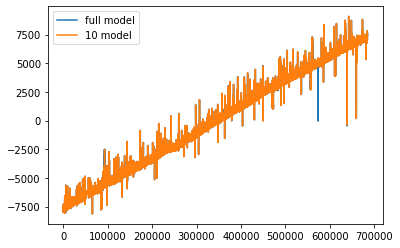

In [28]:
import matplotlib.pyplot as plt

fitted_multi_model.resid.plot(label = "full model")
fitted_multi_model_9.resid.plot(label = "10 model")

plt.legend()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_data = train_qual.drop(columns = 'user_id').astype(float)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF Factor    features
0     1076.917669   quality_0
1        5.000413   quality_1
2     1076.754290   quality_2
3             NaN   quality_3
4             NaN   quality_4
5        1.654537   quality_5
6        2.965868   quality_6
7        2.963458   quality_7
8        1.226629   quality_8
9        1.401355   quality_9
10       1.665630  quality_10
11       4.810943  quality_11
12       1.027793  quality_12
13  406532.922406        year
14       1.001401       month
15       1.003494        days
16       1.004659        hour
17       1.002426   fwver_int

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_data_2 = x_data.drop(columns = 'year').astype(float)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data_2.values, i) for i in range(x_data_2.shape[1])]
vif["features"] = x_data_2.columns
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF Factor    features
0   1076.998353   quality_0
1      5.766677   quality_1
2   1076.835559   quality_2
3           NaN   quality_3
4           NaN   quality_4
5      1.656471   quality_5
6      2.978693   quality_6
7      2.986175   quality_7
8      1.246392   quality_8
9      1.401761   quality_9
10     1.670999  quality_10
11     5.917871  quality_11
12     1.032177  quality_12
13    85.878033       month
14     4.007624        days
15     4.503786        hour
16    78.499140   fwver_int

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_data_3 = x_data_2.drop(columns = 'quality_0').astype(float)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data_3.values, i) for i in range(x_data_3.shape[1])]
vif["features"] = x_data_3.columns
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF Factor    features
0     5.766677   quality_1
1     1.401608   quality_2
2          NaN   quality_3
3          NaN   quality_4
4     1.656467   quality_5
5     2.978693   quality_6
6     2.986175   quality_7
7     1.246392   quality_8
8     1.401482   quality_9
9     1.670822  quality_10
10    5.917871  quality_11
11    1.032174  quality_12
12   85.877895       month
13    4.007624        days
14    4.503776        hour
15   78.499072   fwver_int

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_data_4 = x_data_3.drop(columns = 'month').astype(float)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data_4.values, i) for i in range(x_data_4.shape[1])]
vif["features"] = x_data_4.columns
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF Factor    features
0     5.766674   quality_1
1     1.401608   quality_2
2          NaN   quality_3
3          NaN   quality_4
4     1.656463   quality_5
5     2.978691   quality_6
6     2.985960   quality_7
7     1.245998   quality_8
8     1.401073   quality_9
9     1.670789  quality_10
10    5.914203  quality_11
11    1.032129  quality_12
12    3.852969        days
13    4.277267        hour
14    7.407696   fwver_int

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_data_5 = x_data_4.drop(columns = ['quality_3', 'quality_4']).astype(float)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data_5.values, i) for i in range(x_data_5.shape[1])]
vif["features"] = x_data_5.columns
vif

VIF Factor    features
0     5.766674   quality_1
1     1.401608   quality_2
2     1.656463   quality_5
3     2.978691   quality_6
4     2.985960   quality_7
5     1.245998   quality_8
6     1.401073   quality_9
7     1.670789  quality_10
8     5.914203  quality_11
9     1.032129  quality_12
10    3.852969        days
11    4.277267        hour
12    7.407696   fwver_int

In [34]:
# x_data4_ = sm.add_constant(x_data_4, has_constant = "add")
# x_data5_ = sm.add_constant(x_data_5, has_constant = "add")

# model_vif = sm.OLS(target, x_data_4)
# fitted_model_vif = model_vif.fit()

model_vif2 = sm.OLS(target,x_data_5)
fitted_model_vif = model_vif2.fit()

# 두 vif를 통한 변수제거 회귀모델의 결과를 비교

fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                user_id   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                          7.301e+05
Date:                Tue, 12 Jan 2021   Prob (F-statistic):                        0.00
Time:                        08:29:47   Log-Likelihood:                     -6.7549e+06
No. Observations:              684139   AIC:                                  1.351e+07
Df Residuals:                  684126   BIC:                                  1.351e+07
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quality_1     10.4160     27.746      0.375      0.707     -43.965      64.797
quality_2      0.0028      0.014      0.203      0.839      -0.025       0.030
quality_5      0.0016      0.003      0.552      0.581      -0.004       0.007
quality_6      0.1185      0.279      0.425      0.671      -0.428       0.665
quality_7     -0.4667      0.029    -16.344      0.000      -0.523      -0.411
quality_8    -70.0239      5.506    -12.718      0.000     -80.815     -59.233
quality_9      0.0057      0.002      2.585      0.010       0.001       0.010
quality_10    -0.0010      0.000     -2.319      0.020      -0.002      -0.000
quality_11  -403.8733     31.402    -12.862      0.000    -465.419    -342.327
quality_12  -131.3031     30.292     -4.335      0.000    -190.675     -71.931
days          36.4244      0.636     57.263      0.000      35.178      37.671
hour          56.0704      0.778     72.041      0.000      54.545      57.596
fwver_int      0.0036   3.42e-06   1044.750      0.000       0.004       0.004
==============================================================================
Omnibus:                    26626.751   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12968.570
Skew:                          -0.131   Prob(JB):                         0.00
Kurtosis:                       2.379   Cond. No.                     3.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

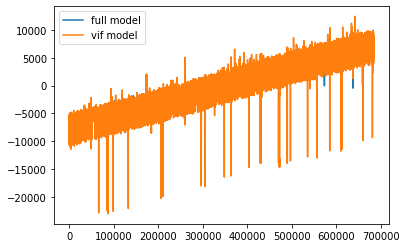

In [35]:
fitted_multi_model.resid.plot(label = "full model")
fitted_model_vif.resid.plot(label = "vif model")

plt.legend()